In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
print ('Done.')

from subprocess import check_output

Done.


In [7]:
draft78 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%20Draft%20Value/draft78.csv')
season78 = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%20Draft%20Value/season78.csv')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Yrs   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     263.0
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           5.13e-23
Time:                        18:54:09   Log-Likelihood:                -76.998
No. Observations:                  59   AIC:                             158.0
Df Residuals:                      57   BIC:                             162.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4125      0.239     39.312      0.000       8.933       9.892
Pick          -0.1126      0.007    -16.216      0.000      -0.126      -0.099
==============================================================================
Omnibus:                        4.372   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.077
Skew:                          -0.118   Prob(JB):                        0.354
Kurtosis:                       2.112   Cond. No.                         69.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

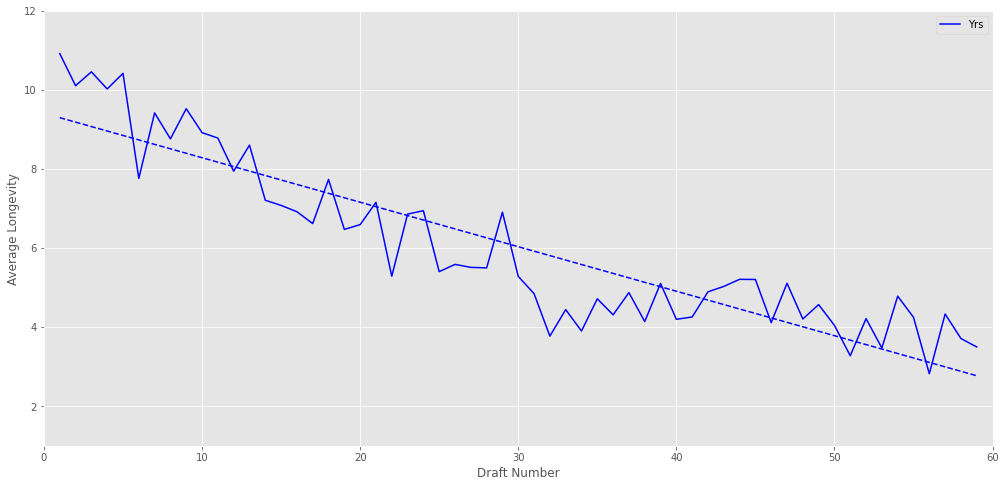

In [8]:
draft78_top = draft78[draft78['Pick']<60]
longevity = draft78_top.groupby(['Pick'])['Yrs'].mean()
longevity = longevity.reset_index()
ax = longevity.plot(x='Pick', y='Yrs', kind='line', figsize=(17,8), color='b');
plt.ylabel('Average Longevity');
plt.xlabel('Draft Number');
plt.ylim((1,12))
plt.xlim((0,60))

x = longevity['Pick']
y = longevity['Yrs']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")

import statsmodels.api as sm
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

In [9]:
draft_merge = pd.merge(draft78_top, season78, on='Player', how='inner')
draft_merge[:5]

,Pick,Player,Yrs,Draft,Season,WS
0,1,Mychal Thompson,12.0,1978,1979,4.4
1,1,Mychal Thompson,12.0,1978,1981,5.3
2,1,Mychal Thompson,12.0,1978,1982,8.2
3,1,Mychal Thompson,12.0,1978,1983,5.4
4,1,Mychal Thompson,12.0,1978,1984,6.9


,Season,Player,WS
12805,2011,Patrick Ewing,-0.1


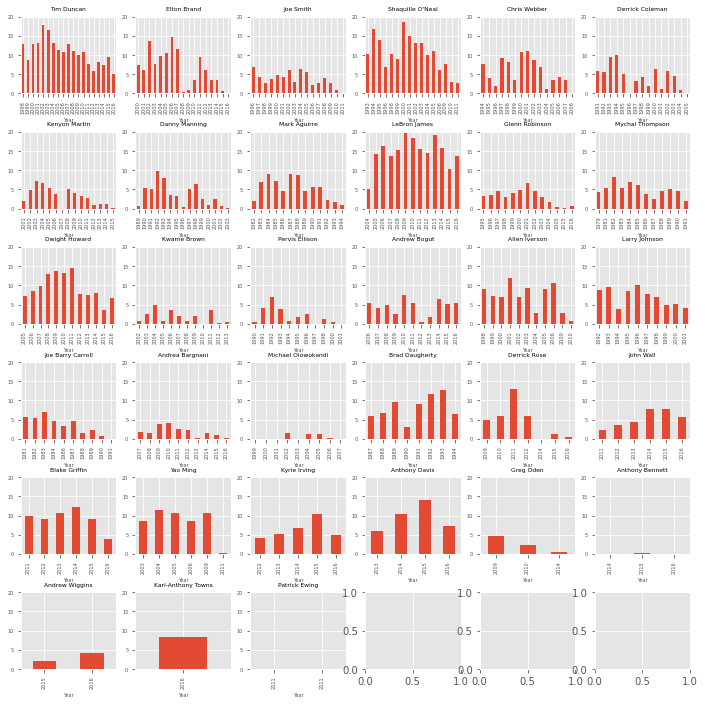

In [10]:
firstpicks = draft_merge[draft_merge['Pick']==1].groupby(['Player']).count()
firstpicks = firstpicks.sort_values(by='Yrs', ascending=False)
first_list = firstpicks.index.tolist()
graphs = len(first_list)

position = []
for i in range(6):
    for j in range(6):
        b = i,j
        position.append(b)

fig, axes = plt.subplots(nrows=6, ncols=6, sharey=False, sharex=False, figsize=(12,12))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    draft_merge[draft_merge['Player']==first_list[i]].plot(kind='bar',x='Season', y='WS', 
                                                           ax=axes[position[i]], legend=False)

for i in range(graphs):
    axes[position[i]].set_title(first_list[i], size = 6)
    axes[position[i]].tick_params(labelsize=5)
    axes[position[i]].set_xlabel("Year", size = 5)
    axes[position[i]].set_ylim((0,20))

season78[season78['Player']=='Patrick Ewing']

In [11]:
year_group = draft_merge.groupby(['Player','Yrs'])['WS'].agg(['mean','count'])
year_group = year_group.reset_index()

year_group['count_check']=year_group['Yrs']-year_group['count']
weirdos = year_group[year_group.count_check != 0]

duplicates = weirdos[weirdos.duplicated('Player') == True]['Player'].tolist()
true_weirdos = weirdos[weirdos['Player'].isin(duplicates) == False]
true_weirdos.sort_values('count_check')

year_group = year_group[year_group['Player'].isin(true_weirdos['Player'].tolist()) == False]

year_group.columns.values[2] = 'Avg_WS'
year_group

,Player,Yrs,Avg_WS,count,count_check
0,A.C. Green,16.0,6.212500,16,0.0
1,A.J. Bramlett,1.0,-0.200000,1,0.0
2,A.J. English,2.0,0.550000,2,0.0
3,A.J. Guyton,3.0,0.100000,3,0.0
4,A.J. Price,6.0,0.783333,6,0.0
...,...,...,...,...,...
1778,Zarko Cabarkapa,3.0,0.400000,3,0.0
1779,Zaza Pachulia,13.0,3.253846,13,0.0
1780,Zeljko Rebraca,5.0,1.640000,5,0.0
1781,Zoran Planinic,3.0,0.533333,3,0.0


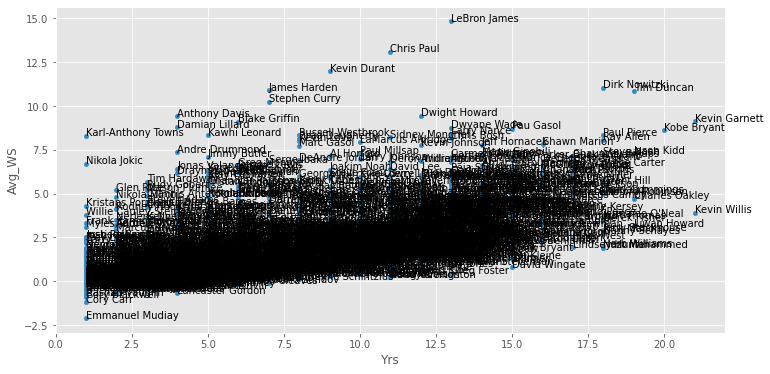

In [12]:
year_group_graph = year_group.iloc[:,0:3]
year_group_graph = year_group_graph.set_index('Player')

fig, ax = plt.subplots() 
year_group_graph.plot(kind='scatter', x='Yrs', y='Avg_WS', figsize=(12,6), ax=ax)

for index, rows in year_group_graph.iterrows():
    ax.annotate(index, rows)